In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
data = pd.read_csv('./Data/german_credit.csv')
data.shape

(1000, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
data.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
data.isna().any()

default                       False
account_check_status          False
duration_in_month             False
credit_history                False
purpose                       False
credit_amount                 False
savings                       False
present_emp_since             False
installment_as_income_perc    False
personal_status_sex           False
other_debtors                 False
present_res_since             False
property                      False
age                           False
other_installment_plans       False
housing                       False
credits_this_bank             False
job                           False
people_under_maintenance      False
telephone                     False
foreign_worker                False
dtype: bool

In [7]:
data.isnull().any()

default                       False
account_check_status          False
duration_in_month             False
credit_history                False
purpose                       False
credit_amount                 False
savings                       False
present_emp_since             False
installment_as_income_perc    False
personal_status_sex           False
other_debtors                 False
present_res_since             False
property                      False
age                           False
other_installment_plans       False
housing                       False
credits_this_bank             False
job                           False
people_under_maintenance      False
telephone                     False
foreign_worker                False
dtype: bool

In [ ]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
print('Number of columns NOT to be converted: ', data.select_dtypes(exclude='object').columns.size)
print('Number of columns to be converted: ', data.select_dtypes(include='object').columns.size)

Number of columns NOT to be converted:  8
Number of columns to be converted:  13


In [9]:
number_of_new_columns = 0
columns = data.select_dtypes(include='object').columns
for col in columns:
    number_of_new_columns += data[col].unique().size
print('Number of new dummay columns: ', number_of_new_columns)

Number of new dummay columns:  54


In [10]:
print('Total new set of columns should be: ', data.select_dtypes(exclude='object').columns.size + number_of_new_columns)

Total new set of columns should be:  62


In [11]:
data = pd.get_dummies(data)

In [12]:
# Print Shape of model data

In [13]:
data.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [14]:
data.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

pd.get_dummies drops the orginal variables which are converted to dummy.

So, no need to perform this step

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [15]:
X = data.drop('default', axis=1)
y = data['default']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 61), (300, 61), (700,), (300,))

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [18]:
rfcl = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion="entropy", random_state=9999)

In [19]:
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [20]:
y_predict = rfcl.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [21]:
confusion_matrix(y_test, y_predict)

array([[204,  13],
       [ 47,  36]], dtype=int64)

In [22]:
print('Accuracy Score: ', accuracy_score(y_test, y_predict))

Accuracy Score:  0.8


In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       217
           1       0.73      0.43      0.55        83

    accuracy                           0.80       300
   macro avg       0.77      0.69      0.71       300
weighted avg       0.79      0.80      0.78       300



In [ ]:
print('Training Accuracy: ', rfcl.score(X_train, y_train))
print('Testing Accuracy: ', rfcl.score(X_test, y_test))

### Q6 Show the list of the features importance( 1 Marks)

In [24]:
features = dict(zip(X.columns, rfcl.feature_importances_))

In [68]:
# Showing top 10 features in sorted order
sorted(features.items(), key=lambda x: x[1], reverse=True)[1:10]

[('age', 0.07924810406718653),
 ('duration_in_month', 0.07549829678682946),
 ('account_check_status_no checking account', 0.04972584300565643),
 ('present_res_since', 0.0357806214879142),
 ('installment_as_income_perc', 0.03443533941572274),
 ('account_check_status_< 0 DM', 0.03125857831683644),
 ('credits_this_bank', 0.01833709473901267),
 ('savings_... < 100 DM', 0.01823237557733829),
 ('credit_history_critical account/ other credits existing (not at this bank)',
  0.017781685574844327)]

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [26]:
# Use below values
num_folds = 10
seed = 77

In [27]:
kfold = KFold(num_folds, True, random_state=seed)

In [28]:
train_scores, test_scores = [], []
for train, test in kfold.split(data):
    X_train = data.loc[train, data.columns != 'default']
    y_train = data.loc[train, 'default']
    X_test = data.loc[test, data.columns != 'default']
    y_test = data.loc[test, 'default']
    rfcl.fit(X_train, y_train)
    train_scores.append(rfcl.score(X_train, y_train))
    test_scores.append(rfcl.score(X_test, y_test))

In [29]:
print('Training score: ', np.mean(train_scores))
print('Testing score: ', np.mean(test_scores))

Training score:  1.0
Testing score:  0.769


In [30]:
#Validate the Random Forest model build above using k fold

Instead of iterating through all folds, a simpler cross_val_score can be used to determine the score

In [31]:
cv_scores = cross_val_score(rfcl, X, y, cv=kfold)
cv_scores

array([0.88, 0.82, 0.69, 0.79, 0.74, 0.74, 0.77, 0.73, 0.73, 0.8 ])

In [ ]:
#Calculate Mean score

In [32]:
print('Mean cross validation score: ', np.mean(cv_scores))

Mean cross validation score:  0.769


#### Mean Scores by the Cross validastion model and Random Forest model are same

In [33]:
# Calculate score standard deviation using std()

In [35]:
print('Standard Deviation of cross validation scores: ', np.std(cv_scores))

Standard Deviation of cross validation scores:  0.05223983154643592


# Q8 Print the confusion matrix( 1 Marks)

In [36]:
y_predict = cross_val_predict(rfcl, X, y, cv=kfold)

In [37]:
conf = confusion_matrix(y, y_predict)
conf

array([[647,  53],
       [178, 122]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [38]:
print('Accuracy score: ', accuracy_score(y, y_predict))

Accuracy score:  0.769


In [39]:
print('Recall or Sensitivity score: ', recall_score(y, y_predict))

Recall or Sensitivity score:  0.4066666666666667


In [40]:
print('Precision score: ', precision_score(y, y_predict))

Precision score:  0.6971428571428572


In [56]:
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       700
           1       0.70      0.41      0.51       300

    accuracy                           0.77      1000
   macro avg       0.74      0.67      0.68      1000
weighted avg       0.76      0.77      0.75      1000



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [ ]:
#Hint: Use roc_curve

In [44]:
# Getting probability from the Cross validation by "predict_proba" method
y_probs = cross_val_predict(rfcl, X, y, cv=kfold, method='predict_proba')

In [45]:
# Getting the probabilities for the positive outcome only
y_probs = y_probs[:, 1]

In [48]:
fpr, tpr, threshold = roc_curve(y, y_probs)

In [52]:
roc_auc = roc_auc_score(y, y_probs)
roc_auc

0.7956452380952381

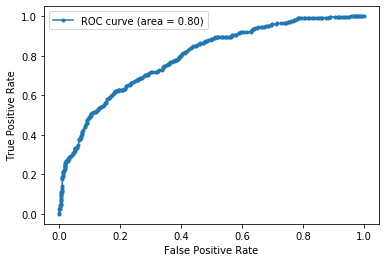

In [55]:
plt.figure()
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [54]:
roc_auc = roc_auc_score(y, y_probs)
print('AUC by Cross Validation: ', roc_auc)

AUC by Cross Validation:  0.7956452380952381


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [61]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [62]:
from sklearn.utils import resample

In [65]:
accuracy = []
for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

In [66]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7910000000000001
Standard deviation:  0.029478805945967353
